In [1]:
# %load /Users/Jonathan/.je.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,6

import json
import re

In [2]:
df_train = pd.read_csv('data/train.csv')

In [3]:
df_test = pd.read_csv('data/test.csv')

In [4]:
df_train.shape

(3000, 23)

In [5]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [6]:
len(df_train.columns)

23

In [7]:
df_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [8]:
# import altair as alt
# from vega_datasets import data
# alt.renderers.enable('notebook')

# source = data.cars()

# iris = data.iris()

# alt.Chart(iris).mark_point().encode(
#     x='petalLength',
#     y='petalWidth',
#     color='species'
# )

In [9]:
df_train.corr()

,id,budget,popularity,runtime,revenue
id,1.000000,0.019732,-0.007470,0.010750,0.000610
budget,0.019732,1.000000,0.342356,0.238373,0.752965
popularity,-0.007470,0.342356,1.000000,0.133690,0.461460
runtime,0.010750,0.238373,0.133690,1.000000,0.216380
revenue,0.000610,0.752965,0.461460,0.216380,1.000000


#### original_language

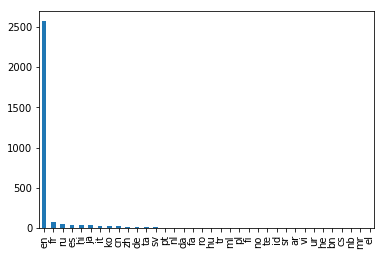

In [10]:
df_train['original_language'].value_counts().plot(kind='bar')

#### Belongs_to_collection

In [11]:
df_train['belongs_to_collection'].apply(lambda x: pd.isna(x)).value_counts()
# Convert 'belongs_to_collection' to binary value: is or is not serial movie
df_train['belongs_to_collection'].fillna(0,inplace=True)
# df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x:0 if x==0 else 1)

df_test['belongs_to_collection'].fillna(0,inplace=True)

In [12]:
df_train['belongs_to_collection'].apply(lambda x:0 if x==0 else 1).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

2396 values are empty (do not belong to collections)

In [13]:
df_train['belongs_to_collection'][0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [14]:
# extract the name from the line, return Nan if no line
def get_name(x):
    print(x,type(x))
    if x == 0:
        return np.nan
    else:
        x = str(x)
        x = x.replace('\'','\"')
        print(x)
        return re.findall(r'name\":\s\"(.*?)\"',x)[0]
        #return json.loads(x)[0]['name']

#    print('-->')
    #return re.findall('name\':\s\'(.*?)\',',str(x))[0]
    #return "error"

In [15]:
df_train['collection_name'] = df_train['belongs_to_collection'].apply(lambda x: get_name(x))
df_test['collection_name'] = df_test['belongs_to_collection'].apply(lambda x: get_name(x))

[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}] <class 'str'>
[{"id": 313576, "name": "Hot Tub Time Machine Collection", "poster_path": "/iEhb00TGPucF0b4joM1ieyY026U.jpg", "backdrop_path": "/noeTVcgpBiD48fDjFVic1Vz7ope.jpg"}]
[{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}] <class 'str'>
[{"id": 107674, "name": "The Princess Diaries Collection", "poster_path": "/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg", "backdrop_path": "/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 256377, 'name': 'The Muppet Collection', 'poster_path': '/8Ew8EIdFFurMMYjSbWPu1Hl4vLX.jpg', 'backdrop_path': '/1AWd3MM90G47mxtD112gRDxSXY9.jpg'}] <class 'str'>
[{"id": 256377, "name": "The Muppet Collection", "po

[{'id': 74508, 'name': '[REC] Collection', 'poster_path': '/jTA37dMZVUFej20EoM5SomKtnYi.jpg', 'backdrop_path': '/rDzuccVBZSyNVQ26hTRT0DvneVA.jpg'}] <class 'str'>
[{"id": 74508, "name": "[REC] Collection", "poster_path": "/jTA37dMZVUFej20EoM5SomKtnYi.jpg", "backdrop_path": "/rDzuccVBZSyNVQ26hTRT0DvneVA.jpg"}]
[{'id': 99635, 'name': 'A Better Tomorrow Collection', 'poster_path': '/b7UQJjwIXLtKejp5FvspTqRh9VP.jpg', 'backdrop_path': '/mLtlXvBFG6Q2BZHkeciWO3BYfhH.jpg'}] <class 'str'>
[{"id": 99635, "name": "A Better Tomorrow Collection", "poster_path": "/b7UQJjwIXLtKejp5FvspTqRh9VP.jpg", "backdrop_path": "/mLtlXvBFG6Q2BZHkeciWO3BYfhH.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 33514, 'name': 'The Twilight Collection', 'poster_path': '/2o4zgGjVryMOPdNqLZWsSPqRkOH.jpg', 'backdrop_path': '/rv5b06YAvmekw0D6Ul2ps9JbH4C.jpg'}] <class 'str'>
[{"id": 33514, "name": "The Twilight Collection", "poster_path": "/2o4zgGjVryMOPdNqLZWsSPqRkOH.jpg", "backdrop_path": "/rv5b06YAvmekw0D6Ul2

[{"id": 166379, "name": "Turbulence Collection", "poster_path": "/zf9uc7kXnVnD75zwVYSzTdJKUUs.jpg", "backdrop_path": "/7e6gGVQpTDKK54ByvBDjeqrm8au.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 123724, 'name': 'Dracula (Hammer Series)', 'poster_path': '/n5SozLvdQZ7cYJb22ZIwNw1DzSg.jpg', 'backdrop_path': '/hybYYwBqaomfePU3uaiJfpg7ykC.jpg'}] <class 'str'>
[{"id": 123724, "name": "Dracula (Hammer Series)", "poster_path": "/n5SozLvdQZ7cYJb22ZIwNw1DzSg.jpg", "backdrop_path": "/hybYYwBqaomfePU3uaiJfpg7ykC.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 386818, 'name': 'Django - Original films', 'poster_path': '/jvzJLNcftgLV40upfMozhJRKdvl.jpg', 'backdrop_path': '/kzM0t0wok7gMsRPTxS8a0JuTcGW.jpg'}] <class 'str'>
[{"id": 386818, "name": "Django - Original films", "poster_pat

[{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}] <class 'str'>
[{"id": 645, "name": "James Bond Collection", "poster_path": "/HORpg5CSkmeQlAolx3bKMrKgfi.jpg", "backdrop_path": "/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 386534, 'name': '... Has Fallen Collection', 'poster_path': '/kM0U7nzdSepUkC6sOvVrqZkdFk5.jpg', 'backdrop_path': '/w5GjGycHi5EOfPx2JSMshCN7OJn.jpg'}] <class 'str'>
[{"id": 386534, "name": "... Has Fallen Collection", "poster_path": "/kM0U7nzdSepUkC6sOvVrqZkdFk5.jpg", "backdrop_path": "/w5GjGycHi5EOfPx2JSMshCN7OJn.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 43064, 'name': 'Speed Collection', 'poster_path': '/9poztwq7SXjEETRdWXcJsl58kxV.jpg', 'backdrop_path': '/75mSNcKIkfZSjXDgytC8UFe6vBl.jpg'}] <class 'str'>
[{

[{'id': 34055, 'name': 'Pokémon Collection', 'poster_path': '/j5te0YNZAMXDBnsqTUDKIBEt8iu.jpg', 'backdrop_path': '/iGoYKA0TFfgSoZpG2u5viTJMGfK.jpg'}] <class 'str'>
[{"id": 34055, "name": "Pokémon Collection", "poster_path": "/j5te0YNZAMXDBnsqTUDKIBEt8iu.jpg", "backdrop_path": "/iGoYKA0TFfgSoZpG2u5viTJMGfK.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}] <class 'str'>
[{"id": 10194, "name": "Toy Story Collection", "poster_path": "/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg", "backdrop_path": "/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg"}]
0 <class 'int'>
0 <class 'int'>
[{'id': 87805, 'name': 'The Gods Must Be Crazy Collection', 'poster_path': '/3KAJpE2OOimXE5Z15LHARbeA0eC.jpg', 'backdrop_path': '/3u6As0EKP2KKPNhzQObCgdYvm7f.jpg'}] <class 'str'>
[{"id": 87805, "name": "The G

0 <class 'int'>
[{'id': 288280, 'name': 'Saturday Night Fever Collection', 'poster_path': '/66JFemhPp5qh0pGYPkGqjocR0Fv.jpg', 'backdrop_path': None}] <class 'str'>
[{"id": 288280, "name": "Saturday Night Fever Collection", "poster_path": "/66JFemhPp5qh0pGYPkGqjocR0Fv.jpg", "backdrop_path": None}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 120794, 'name': 'Batman Collection', 'poster_path': '/adQxUvQW8HXNsvMG5aj71pHh9T.jpg', 'backdrop_path': '/9SpZvXLZDGGtFqVDByGqSGI64Kw.jpg'}] <class 'str'>
[{"id": 120794, "name": "Batman Collection", "poster_path": "/adQxUvQW8HXNsvMG5aj71pHh9T.jpg", "backdrop_path": "/9SpZvXLZDGGtFqVDByGqSGI64Kw.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 151, 'name': 'Star Trek: The Original Series Collection', 'poster_path': '/zcB8KxHA4EapOoZZPAvwgmE1iGK.jpg', 'backdrop_path': '/9BQj9hq0aK6yM9Tm2NJ28jg572y.jpg'}] <class 'str'>
[{"id": 151, "name": "Star Trek: The Original Series Collection", "poster_path": "/zcB8KxHA4E

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 2794, 'name': 'The Chronicles of Riddick Collection', 'poster_path': '/4R2zrqk9KzgxU9UDH3yUUsENXR.jpg', 'backdrop_path': '/xb5zyHecWA7UACdiNPXDA3m5HSY.jpg'}] <class 'str'>
[{"id": 2794, "name": "The Chronicles of Riddick Collection", "poster_path": "/4R2zrqk9KzgxU9UDH3yUUsENXR.jpg", "backdrop_path": "/xb5zyHecWA7UACdiNPXDA3m5HSY.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 106000, 'name': 'Beastmaster Collection', 'poster_path': '/h2WbsEqvWpe3KvT2ArxS1ARSRDl.jpg', 'backdrop_path': '/AeXUmULuf1GFw2YyVbwpxTsTXH.jpg'}] <class 'str'>
[{"id": 106000, "name": "Beastmaster Collection", "poster_path": "/h2WbsEqvWpe3KvT2ArxS1ARSRDl.jpg", "backdrop_path": "/AeXUmULuf1GFw2YyVbwpxTsTXH.jpg"}]
[{'id': 1952, 'name': 'USA: Land of Opportunities Collection', 'poster_path': None, 'backdrop_path': None}] <class 'str'>
[{"id": 1952, "name": "USA: Land of Opportunities Collection", "poster_path": None, "backdrop_path

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 2794, 'name': 'The Chronicles of Riddick Collection', 'poster_path': '/4R2zrqk9KzgxU9UDH3yUUsENXR.jpg', 'backdrop_path': '/xb5zyHecWA7UACdiNPXDA3m5HSY.jpg'}] <class 'str'>
[{"id": 2794, "name": "The Chronicles of Riddick Collection", "poster_path": "/4R2zrqk9KzgxU9UDH3yUUsENXR.jpg", "backdrop_path": "/xb5zyHecWA7UACdiNPXDA3m5HSY.jpg"}]
0 <class 'int'>
[{'id': 196753, 'name': 'Ghost in the Shell: Arise', 'poster_path': '/zaN0EZ4f1b2jCtDj7mpVhPH9C9K.jpg', 'backdrop_path': '/18WkPWaXZICbwjJ4VojlwbBYq6D.jpg'}] <class 'str'>
[{"id": 196753, "name": "Ghost in the Shell: Arise", "poster_path": "/zaN0EZ4f1b2jCtDj7mpVhPH9C9K.jpg", "backdrop_path": "/18WkPWaXZICbwjJ4VojlwbBYq6D.jpg"}]
[{'id': 207447, 'name': 'Firestarter Collection', 'poster_path': '/6kLGcwTZMXPBoj1a0CkhWergeXM.jpg', 'backdrop_path'

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 251858, 'name': 'Brancaleone Collection', 'poster_path': '/fXzUHKyHFZUb3pqRJmPU3gfUSM8.jpg', 'backdrop_path': '/wRIF7eniNkFjDa9zGv1RmrR6cBl.jpg'}] <class 'str'>
[{"id": 251858, "name": "Brancaleone Collection", "poster_path": "/fXzUHKyHFZUb3pqRJmPU3gfUSM8.jpg", "backdrop_path": "/wRIF7eniNkFjDa9zGv1RmrR6cBl.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 425164, 'name': 'Dragon Ball Z (Movie) Collection', 'poster_path': '/2VMZ1zRFPnUQtQp5K4WRXvDYBjh.jpg', 'backdrop_path': '/7PcbijxTfwi9vjWEfXdS0ReAw8q.jpg'}] <class 'str'>
[{"id": 425164, "name": "Dragon Ball Z (Movie) Collection", "poster_path": "/2VMZ1zRFPnUQtQp5K4WRXvDYBjh.jpg", "backdrop_path": "/7PcbijxTfwi9vjWEfXdS0ReAw8q.jpg"}]
0 <class 'int'>
[{'id': 10457, 'name': 'Once Upon a Time in China Collection', 'poster_path': '/gAuv7bhSYFVTYAazFkHOhPRyONi.jpg', 'backdrop_path': '/gQNRJ3C

In [16]:
df_train['has_collection'] = df_train['collection_name'].apply(lambda x: 0 if pd.isna(x) else 1)
df_test['has_collection'] = df_test['collection_name'].apply(lambda x: 0 if pd.isna(x) else 1)

In [17]:
df_train = df_train.drop('belongs_to_collection',axis = 1)
df_test = df_test.drop('belongs_to_collection',axis = 1)

In [18]:
df_train.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection_name,has_collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,1
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,NaN,0
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,NaN,0
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,NaN,0


#### Genres

In [19]:
x = df_train.iloc[100]['genres']
x

"[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 80, 'name': 'Crime'}, {'id': 27, 'name': 'Horror'}]"

In [20]:
def pattern(x):
    return re.findall(r'name\':\s\'(.*?)\'',x)

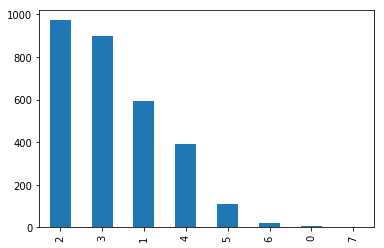

In [21]:
df_train['genres'].apply(lambda x: len(pattern(x)) if not pd.isna(x) else 0).value_counts().plot('bar')

In [22]:
a = []
df_train['genres'].apply(lambda x: a.append(pattern(x)) if not pd.isna(x) else 0)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
2970   NaN
2971   NaN
2972   NaN
2973   NaN
2974   NaN
2975   NaN
2976   NaN
2977   NaN
2978   NaN
2979   NaN
2980   NaN
2981   NaN
2982   NaN
2983   NaN
2984   NaN
2985   NaN
2986   NaN
2987   NaN
2988   NaN
2989   NaN
2990   NaN
2991   NaN
2992   NaN
2993   NaN
2994   NaN
2995   NaN
2996   NaN
2997   NaN
2998   NaN
2999   NaN
Name: genres, Length: 3000, dtype: float64

In [23]:
from collections import Counter
b = []
[b.append(e) for els in a for e in els]
genres_dict = Counter(b)

In [24]:
sorted(genres_dict.items(),key=lambda x: x[1],reverse=True)
# or genres_dict.most_common() 

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [25]:
df_train[df_train['genres'].apply(lambda x: pd.isna(x))]

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection_name,has_collection
470,471,2000000,NaN,NaN,tt0349159,en,"The Book of Mormon Movie, Volume 1: The Journey",The story of Lehi and his wife Sariah and thei...,0.079856,/rJnEmqJDMu4aYfALVCcPrjqIDaK.jpg,...,NaN,Released,"2600 years ago, one family began a remarkable ...","The Book of Mormon Movie, Volume 1: The Journey",NaN,"[{'cast_id': 1, 'character': 'Sam', 'credit_id...",NaN,1672730,NaN,0
1622,1623,400000,NaN,NaN,tt0261755,en,Jackpot,"Sunny Holiday, an aspiring singing star, aband...",0.218588,/knmfYv7FI1EubSIsCsvdvdMWRwt.jpg,...,NaN,Released,NaN,Jackpot,NaN,"[{'cast_id': 4, 'character': '', 'credit_id': ...","[{'credit_id': '52fe4d3c9251416c9110f319', 'de...",43719,NaN,0
1814,1815,2700000,NaN,NaN,tt0110289,it,Курочка Ряба,In Soviet days an old peasant woman's hen begi...,0.677253,/pAm8qGWw1DBs7IkVkOJjXhVHDjz.jpg,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,"Ryaba, My Chicken",NaN,[],"[{'credit_id': '52fe4c139251416c910eeee3', 'de...",4635143,NaN,0
1819,1820,0,NaN,NaN,tt0352622,ru,Небо. Самолёт. Девушка.,"The tale of a brief, life-altering love affair...",0.518078,/jetrpybEQFsZdUTOGGj6NSODk5f.jpg,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Sky. Plane. Girl.,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '52fe4728c3a368484e0b7f53', 'de...",314195,NaN,0
2423,2424,500000,NaN,NaN,tt0984177,en,Amarkalam,Vasu is a tough street crook who lives at a mo...,0.493342,/1ZY9hTkwiV0NjJoSM2zIyojQulD.jpg,...,"[{'iso_639_1': 'ta', 'name': 'தமிழ்'}]",Released,NaN,Amarkalam,NaN,"[{'cast_id': 1, 'character': 'Vaasu', 'credit_...","[{'credit_id': '53b42af80e0a26598c00cea3', 'de...",500000,NaN,0
2686,2687,0,NaN,NaN,tt0833448,ru,Лифт,A psychological thriller. One quite ordinary s...,0.158207,/1tekHzyJggMmRxRlshR0x0AVwcO.jpg,...,NaN,Released,NaN,Lift,NaN,[],"[{'credit_id': '57b8a5d19251411bc6000587', 'de...",123182,NaN,0
2900,2901,200000,NaN,http://ritaslastfairytale.ru/,tt1766044,en,Poslednyaya skazka Rity,The film speaks about universal themes of love...,0.560685,/6dS0fDrigZiHUiwuS5yjJECc919.jpg,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Rita's Last Fairy Tale,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 3, 'character': '', 'credit_id': ...","[{'credit_id': '52fe4ab89251416c750ebaab', 'de...",486937,NaN,0


#### Production companies

In [26]:
df_train['production_companies'][6]
x = df_train['production_companies'][6]

In [27]:
str(x)

"[{'name': 'Ghost House Pictures', 'id': 768}, {'name': 'North Box Productions', 'id': 22637}]"

In [28]:
re.findall('name\':\s\'(.*?)\'',x)

['Ghost House Pictures', 'North Box Productions']

In [29]:
# the number of production companies
df_train['production_companies'].apply(lambda x: len(re.findall('name\':\s\'(.*?)\'',x)) if not pd.isna(x) else 0)

0       3
1       1
2       3
3       0
4       0
5       0
6       2
7       0
8       3
9       1
10      1
11      4
12      2
13      4
14      7
15      1
16      3
17      4
18      4
19      7
20      4
21      2
22      3
23      3
24      2
25      4
26      4
27      3
28      4
29      1
       ..
2970    3
2971    1
2972    4
2973    2
2974    5
2975    5
2976    2
2977    5
2978    7
2979    2
2980    2
2981    1
2982    1
2983    3
2984    5
2985    2
2986    3
2987    1
2988    1
2989    3
2990    2
2991    2
2992    1
2993    3
2994    1
2995    2
2996    2
2997    3
2998    2
2999    6
Name: production_companies, Length: 3000, dtype: int64

In [30]:
a = df_train['production_companies'].apply(lambda x: len(re.findall('name\':\s\'(.*?)\'',x)) if not pd.isna(x) else 0)

In [31]:
# How many production comanies movies have?
Counter(a).most_common()

[(1, 781),
 (2, 734),
 (3, 582),
 (4, 308),
 (5, 166),
 (0, 157),
 (6, 116),
 (7, 69),
 (8, 36),
 (9, 27),
 (10, 8),
 (11, 6),
 (15, 3),
 (12, 3),
 (14, 2),
 (13, 1),
 (16, 1)]

In [32]:
from IPython.display import Image
Image(url= "https://image.tmdb.org/t/p/w600_and_h900_bestv2/5VKVaTJJsyDeOzY6fLcyTo1RA9g.jpg",width=200, height=100)

In [33]:
# Who are the most popular production companies?
a = df_train['production_companies'].apply(lambda x: re.findall('name\':\s\'(.*?)\'',x) if not pd.isna(x) else 0)

In [34]:
production_companies = []
for pcs in a:
    if pcs != 0:
        for pc in pcs:
            production_companies.append(pc)

In [35]:
Counter(production_companies).most_common()
# or sorted(Counter(production_companies).items(),key = lambda p: p[1],reverse=True)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23),
 ('Castle Rock Entertainment', 21),
 ('Epsilon Motion Pictures', 21),
 ('Morgan Creek Productions', 21),
 ('Original Film', 21),
 ('Focus 

In [36]:
d = pd.DataFrame(Counter(production_companies).most_common())

In [37]:
d.columns = ['a','b']

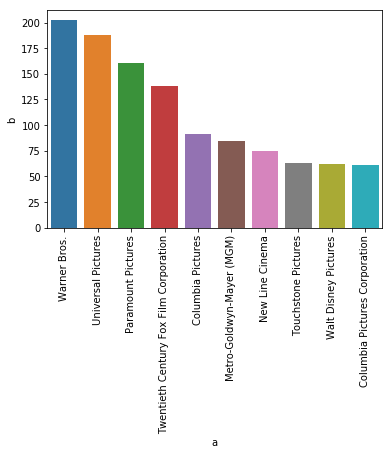

In [38]:
g = sns.barplot(x = 'a', y='b',data = d[:10])
g.set_xticklabels(g.get_xticklabels(),rotation = 90);

#### Production countries

In [39]:
df_train['production_countries'][0]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [40]:
a = df_train['production_countries'].apply(lambda x: len(re.findall('name\':\s\'(.*?)\'',x)) if not pd.isna(x) else 0)

In [41]:
Counter(a).most_common()

[(1, 2222), (2, 525), (3, 116), (4, 57), (0, 55), (5, 21), (6, 3), (8, 1)]

In [42]:
# Who are the most popular production countries?
a = df_train['production_countries'].apply(lambda x: re.findall('name\':\s\'(.*?)\'',x) if not pd.isna(x) else 0)

In [43]:
production_countries = []
for pcs in a:
    print(pcs)
    if pcs != 0:
        for pc in pcs:
            production_countries.append(pc)

['United States of America']
['United States of America']
['United States of America']
['India']
['South Korea']
0
['United States of America', 'Canada']
0
['United States of America']
['United States of America']
['United States of America']
['United States of America']
['United States of America']
['United States of America']
['United States of America']
['Serbia']
['United States of America']
['United Kingdom']
['Austria', 'Germany', 'United Kingdom']
['France']
['United States of America']
['United States of America']
['United States of America']
['United States of America']
['New Zealand']
['Japan', 'United States of America']
['United States of America']
['Canada', 'Ireland']
['United States of America']
['United States of America']
['France']
['Austria', 'France', 'Germany', 'Italy', 'United States of America']
['United States of America']
['United States of America', 'New Zealand', 'Canada', 'Israel', 'Japan']
['United States of America']
['United States of America']
['Ireland'

['Germany']
['United States of America']
['United Kingdom', 'United States of America']
['United States of America']
['Germany', 'United States of America']
['United States of America']
['United States of America']
['United States of America']
['France', 'United Kingdom']
['United Kingdom']
['United States of America']
['Ireland', 'United Kingdom']
['United States of America']
['Australia', 'United States of America']
['Russia']
['Canada']
['United States of America']
['United States of America']
['United States of America']
['United States of America']
['United States of America']
['United States of America']
['United Kingdom']
['United States of America']
['United States of America']
['United States of America']
['United States of America']
['United States of America']
['France', 'United Kingdom', 'United States of America']
['Germany', 'United States of America']
['United States of America']
['Russia']
['United States of America']
['United States of America']
['United States of Amer

['United States of America']
['United States of America']
0
['United States of America']
['United Kingdom', 'United States of America']
['United States of America']
['United States of America']
['Germany', 'United States of America']
['China', 'Hong Kong']
['United States of America']
['United States of America']
['United Kingdom']
['United States of America']
0
['Australia', 'United Kingdom', 'United States of America']
['Spain']
['Canada', 'Italy', 'United States of America']
['United Kingdom']
['United States of America']
['United States of America']
['United Kingdom', 'United States of America']
['United States of America']
['United States of America']
['United States of America']
['United States of America']
['India']
['United Kingdom']
['United States of America', 'Canada']
['United States of America']
['Japan']
['United States of America']
['United Kingdom', 'United States of America']
['United States of America']
['United States of America']
['United States of America']
['Germa

In [44]:
Counter(production_countries).most_common()[:5]

[('United States of America', 2282),
 ('United Kingdom', 380),
 ('France', 222),
 ('Germany', 167),
 ('Canada', 120)]

#### Spoken languages

In [45]:
a = df_train['spoken_languages'].apply(lambda x: len(re.findall('name\':\s\'(.*?)\'',x)) if not pd.isna(x) else 0)
Counter(a).most_common()

[(1, 2105),
 (2, 549),
 (3, 216),
 (4, 72),
 (5, 23),
 (0, 20),
 (7, 6),
 (6, 6),
 (8, 2),
 (9, 1)]

In [46]:
a = df_train['spoken_languages'].apply(lambda x: re.findall('name\':\s\'(.*?)\'',x) if not pd.isna(x) else 0)

In [47]:
languages = []
for lgs in a:
    if lgs != 0:
        for lg in lgs:
            languages.append(lg)

In [48]:
Counter(languages).most_common()[:30]

[('English', 2618),
 ('Français', 288),
 ('Español', 239),
 ('Deutsch', 169),
 ('Pусский', 152),
 ('Italiano', 124),
 ('日本語', 89),
 ('普通话', 68),
 ('हिन्दी', 56),
 ('', 47),
 ('Português', 43),
 ('العربية', 40),
 ('한국어/조선말', 37),
 ('广州话 / 廣州話', 36),
 ('தமிழ்', 27),
 ('Polski', 25),
 ('Magyar', 24),
 ('Latin', 23),
 ('svenska', 22),
 ('ภาษาไทย', 22),
 ('Český', 20),
 ('עִבְרִית', 15),
 ('ελληνικά', 15),
 ('Türkçe', 13),
 ('Dansk', 13),
 ('Nederlands', 10),
 ('فارسی', 10),
 ('Tiếng Việt', 10),
 ('اردو', 8),
 ('Română', 8)]

#### Cast

In [49]:
# 13 missing values
df_train['cast'].apply(lambda x: pd.isna(x)).sum()

13

In [50]:
df_train['cast'].head()

0    [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1    [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2    [{'cast_id': 5, 'character': 'Andrew Neimann',...
3    [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4    [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
Name: cast, dtype: object

In [51]:
df_train['cast'][14]

"[{'cast_id': 5, 'character': 'Chief John Anderton', 'credit_id': '52fe4223c3a36847f8006f53', 'gender': 2, 'id': 500, 'name': 'Tom Cruise', 'order': 0, 'profile_path': '/3oWEuo0e8Nx8JvkqYCDec2iMY6K.jpg'}, {'cast_id': 11, 'character': 'Danny Witwer', 'credit_id': '52fe4223c3a36847f8006f67', 'gender': 2, 'id': 72466, 'name': 'Colin Farrell', 'order': 1, 'profile_path': '/gYHo4N7oJ83hqcElhh9wGqZLklK.jpg'}, {'cast_id': 12, 'character': 'Agatha', 'credit_id': '52fe4223c3a36847f8006f6b', 'gender': 1, 'id': 2206, 'name': 'Samantha Morton', 'order': 2, 'profile_path': '/zRvK2T98rz5smCwRiAaFRq1CoDo.jpg'}, {'cast_id': 6, 'character': 'Director Lamar Burgess', 'credit_id': '52fe4223c3a36847f8006f57', 'gender': 2, 'id': 2201, 'name': 'Max von Sydow', 'order': 3, 'profile_path': '/nwRB1DDylWFC4120kfbtPq2pZzA.jpg'}, {'cast_id': 13, 'character': 'Dr. Iris Hineman', 'credit_id': '52fe4223c3a36847f8006f6f', 'gender': 1, 'id': 2207, 'name': 'Lois Smith', 'order': 4, 'profile_path': '/hYZx3vQ1KICO3Db5Cm8

In [52]:
# most popular cast members
a = df_train['cast'].apply(lambda x: re.findall('name\':\s\'(.*?)\'',x) if not pd.isna(x) else 0)

cast_members = []
for cms in a:
    if cms != 0:
        for cm in cms:
            cast_members.append(cm)
            
Counter(cast_members).most_common()

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21),
 ('Jason Statham', 21),
 ('Keith David', 21),
 ('John Goodman', 21),
 ('Mel Gibson', 21),
 ('Sigourney Weaver', 21),
 ('Frank Welker', 20),
 ('Michael Caine', 20),
 ('George Clooney', 20),
 ('Denzel Washington', 20),
 ('Robert Duvall', 20),
 ('Ed Harris', 20),
 ('Dennis Quaid', 20),
 ('Richard Jenkins', 20),
 ('Matt Damon', 20),
 ('Christopher Plummer', 19),
 ('Gene Hackman', 19),
 ('Christopher Walken', 19),
 ('William H. Macy', 19),
 ('James Franco', 19),
 ('Jim Broadbent', 19),
 ('John C. Reilly', 19),
 ('Kevin Bacon', 19),
 ('Christian Bale', 19),
 ('Alec Baldwin', 19),
 ('Allison Janney', 18),
 ('Brian Cox', 18),
 ('John Leg

In [53]:
# Looking at gender
genders_list = df_train['cast'].apply(lambda x: re.findall('gender\':\s(.*?),',x) if not pd.isna(x) else np.nan)

In [54]:
genders = []
for gl in genders_list:
    if isinstance(gl,list):
        for g in gl:
            genders.append(g)
            
# '2' == male; '1' == female; '0' == unspecified
Counter(genders).most_common()

[('2', 27949), ('0', 20329), ('1', 13533)]

In [55]:
df_train.columns

Index(['id', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'revenue', 'collection_name', 'has_collection'],
      dtype='object')

#### Crew

In [56]:
# 16 missing values
df_train['crew'].apply(lambda x: pd.isna(x)).sum()

16

In [57]:
df_train['crew'][0]

'[{\'credit_id\': \'59ac067c92514107af02c8c8\', \'department\': \'Directing\', \'gender\': 0, \'id\': 1449071, \'job\': \'First Assistant Director\', \'name\': \'Kelly Cantley\', \'profile_path\': None}, {\'credit_id\': \'52fe4ee7c3a36847f82afad7\', \'department\': \'Directing\', \'gender\': 2, \'id\': 3227, \'job\': \'Director\', \'name\': \'Steve Pink\', \'profile_path\': \'/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg\'}, {\'credit_id\': \'5524ed25c3a3687ded000d88\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Writer\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed2d925141720c001128\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Characters\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed3d92514166c1004a5d\', \'department\': \'Production\', \'gender\': 2, \'id\': 57822, \'job\': \'Producer\', \'name\': \'Andrew Panay\', \

In [58]:
# number of crew members
a = df_train['crew'].apply(lambda x: re.findall('name\':\s\'(.*?)\'',x) if not pd.isna(x) else None)

In [59]:
# the mean number of crew member per film
np.array([len(c) for c in a if isinstance(c,list)]).mean()

24.316353887399465

In [60]:
# most popular crew members
a = df_train['crew'].apply(lambda x: re.findall('name\':\s\'(.*?)\'',x) if not pd.isna(x) else 0)

crew_members = []
for cms in a:
    if cms != 0:
        for cm in cms:
            crew_members.append(cm)
            
Counter(crew_members).most_common()

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30),
 ('Jane Jenkins', 29),
 ('John Debney', 28),
 ('Hans Zimmer', 28),
 ('John Papsidera', 28),
 ('Francis Ford Coppola', 28),
 ('Billy Hopkins', 27),
 ('Danny Elfman', 27),
 ('Mindy Marin', 27),
 ('Hans Bjerno', 26),
 ('Sarah Finn', 26),
 ('Neal H. Moritz', 26),
 ('Tim Bevan', 26),
 ('Alan Silvestri', 26),
 ('Mark Isham', 26),
 ('Marco Beltrami', 25),
 ('Scott Rudin', 25),
 ('Arnon Milchan', 25),
 ('Graeme Revell', 25),
 ('Eric Fellner', 25),
 ('Bruce Berman', 25),
 ('Suzanne Smith', 24),
 ('Steven Soderbergh', 24),
 ('Amanda Mackey', 24),
 ('Clint Eastwood', 24),
 ('Thomas Newman', 23),
 ('Frank Marshall', 23),
 ('Peter 

### Analysis

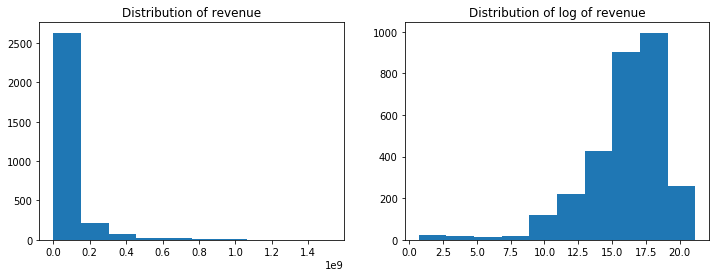

In [61]:
fig, ax = plt.subplots(figsize = (12,4))
plt.subplot(1, 2, 1)
plt.hist(df_train['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(df_train['revenue']));
plt.title('Distribution of log of revenue');

In [62]:
df_train['log_revenue'] = np.log1p(df_train['revenue'])
df_train['log_budget'] = np.log1p(df_train['budget'])

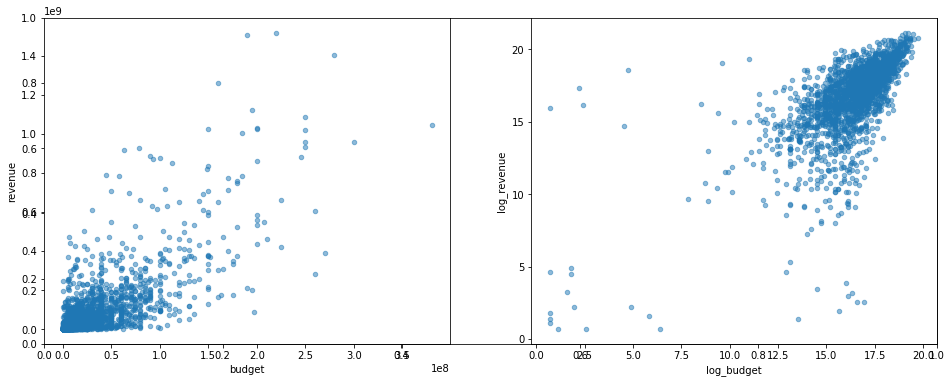

In [63]:
# revenue vs. budget
fig, axes = plt.subplots(figsize = (16,6))#,sharey=False,sharex=False)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
df_train[df_train['budget'] > 0].plot(x='budget', y='revenue',kind='scatter',alpha=0.5,ax = ax1)
df_train[df_train['budget'] > 0].plot(x='log_budget',y = 'log_revenue',kind='scatter',alpha=0.5,ax = ax2)

In [65]:
df_train.to_csv('df_train.csv')
df_test.to_csv('df_test.csv')